In [153]:
import pandas as pd

In [154]:
df = pd.read_csv("data/survey_results_public.csv", index_col="Respondent")

In [155]:
schema_df = pd.read_csv("data/survey_results_schema.csv", index_col="Column")

In [156]:
pd.set_option("display.max_columns", df.shape[1])
pd.set_option("display.max_rows", 61)

In [157]:
countries = ['Bangladesh', 'India']
filt_countries = (df['Country'].isin(countries))

In [180]:
bd_filt = (df['Country'] == 'Bangladesh') 
bd = df.loc[bd_filt]
na_filt = (bd['CompTotal'].isna())

In [182]:
bd_sal = bd[~na_filt]

In [194]:
bd_sal = bd_sal[bd_sal['CompFreq'] == 'Monthly']

In [216]:
bd_sal = bd_sal['CompTotal']

In [220]:
mean_sal_bd = bd_sal.loc[bd_sal.between(bd_sal.quantile(.15), bd_sal.quantile(.90))].mean()

In [207]:
ind_sal = df.loc[(df['Country']=='India') & (df['CompFreq'] == 'Monthly') & ~(df['CompTotal'].isna()), 'CompTotal']

In [221]:
mean_sal_in = ind_sal.loc[ind_sal.between(ind_sal.quantile(.15), ind_sal.quantile(.90))].mean()

In [223]:
mean_sal_bd

54619.348837209305

In [224]:
mean_sal_in

57007.119022316685

In [225]:
dic = {'BD':mean_sal_bd, 'IN':mean_sal_in}

In [226]:
dic

{'BD': 54619.348837209305, 'IN': 57007.119022316685}

In [234]:
new_df = pd.DataFrame(dic, index=[0])

<AxesSubplot:>

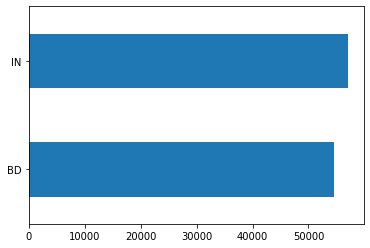

In [239]:
new_df.iloc[0].plot.barh()

In [238]:
help(pd.Series.plot.bar)

Help on function bar in module pandas.plotting._core:

bar(self, x=None, y=None, **kwargs)
    Vertical bar plot.
    
    A bar plot is a plot that presents categorical data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array_like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name, RGB or RGBA code,
            for insta